# Survey of Supervised Learning Methods

In this survey of learning methods, we'll attempt to develop a classification function from training data using the following algorithms

- Logistic Regression
- Linear Discriminant Analysis
- K-Nearest Neighbors
- Decision Trees
- Gaussian Naive Bayes
- Support Vector Machines

While the details of each of these algorithms is beyond the scope of this notebook, we will evaluate the fitness of the results produced by each algorithm using test data.

The content of this notebook has been adapted from [*Your First Machine Learning Projet in Python Step-By-Step*](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) by [Jason Brownlee](https://machinelearningmastery.com/author/jasonb/).

## Preparing the Environment

To perform these machine learning tasks, we'll make use of the following libraries and their dependencies.

- sklearn - a machine learning library
- seaborn - a data visualization library
- pandas - library providing the data structures in which we'll store our data

In [1]:
import sys
!{sys.executable} -m pip install sklearn seaborn pandas

We'll also configure plotting.  First we ensure that generated plots appear in the notebook itself.

In [2]:
%matplotlib inline

Next, we set the figure size for plots.

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})

## Lab

For this lab, we'll work with the [Iris Flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) - a collection of measurements of petal and sepal length and width for three Iris species.  Our objective will be to create a model that accurately classifies iris species by petal and sepal measurements.

### Loading the Data

We start by loading the data.  This data set is among the example datasets included with Seaborn.

In [4]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The data set includes the values noted above.

In [5]:
len(iris_data)

150

There are 150 rows of data; each of the three species has a 50 sets of measurements.  

### Explore the Data

Before applying the machine learning algorithms, its helpful to explore the data in order to get an understanding of the input values.  An understanding of the data will help to evaluate the models produced by the algorithms and determine how well they perform.

We can start by looking at the pair-wise scatter plots of features with coloring by species.

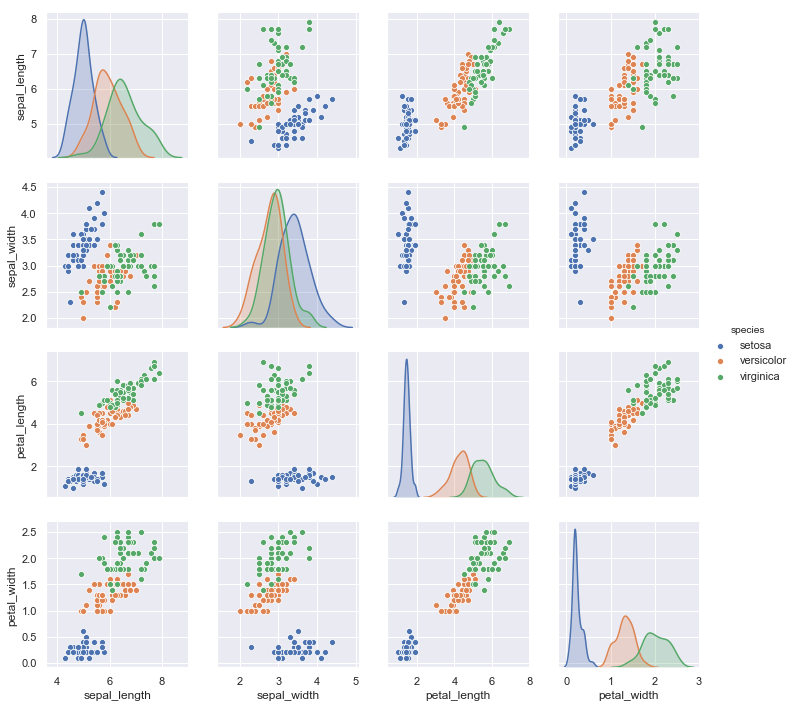

In [6]:
sns.pairplot(iris_data, hue="species")

We can see clear divisions among the species in some of these plots.  We can also look at the distribution of data for each species using boxplots.

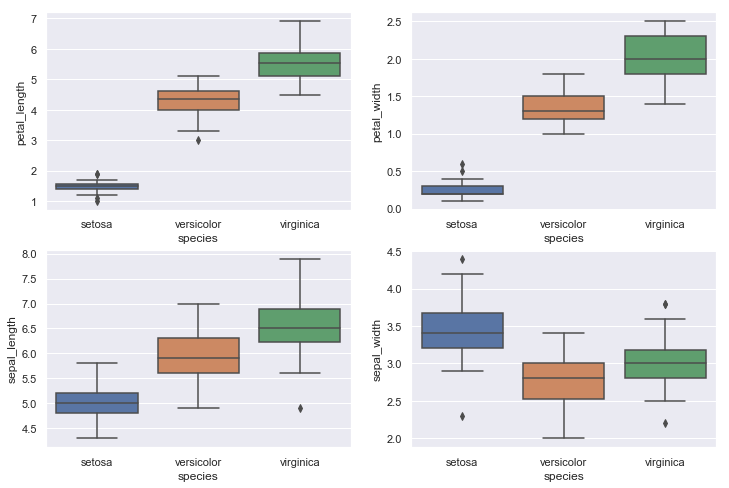

In [7]:
axes = sns.mpl.pyplot.subplot(2,2,1)
sns.boxplot(x="species", y="petal_length", data=iris_data, ax=axes)
axes = sns.mpl.pyplot.subplot(2,2,2)
sns.boxplot(x="species", y="petal_width", data=iris_data, ax=axes)
axes = sns.mpl.pyplot.subplot(2,2,3)
sns.boxplot(x="species", y="sepal_length", data=iris_data, ax=axes)
axes = sns.mpl.pyplot.subplot(2,2,4)
sns.boxplot(x="species", y="sepal_width", data=iris_data, ax=axes)

Looking at the box plots, it looks like we can determine whether or not an Iris is of the Setosa species based on the petal length or width (there is no overlap between petal measurements for this species with measurements for the others).  It it less clear how to differentiate betwee the Versicolor and Virginica species.

### Separating Training and Testing Data

As a next step, we can separate our dataset into two parts, one used to train a model and the other used to test the effectiveness of the trained models.  To do this, we'll make use of the sklearn library.

In [8]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris_data, test_size=0.2)

print("Training rows")
print(iris_train.species.value_counts())
print("Testing rows")
print(iris_test.species.value_counts())

Training rows
versicolor    43
virginica     40
setosa        37
Name: species, dtype: int64
Testing rows
setosa        13
virginica     10
versicolor     7
Name: species, dtype: int64


We can see data from each species appears in both the training and testing data.

### Evaluate Algorithms

To set up the code need to run the algorithms and evaluate the resulting models fitness, we'll import submodules, classes, and function from sklearn.

In [9]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

To simplify the process, we'll use a for-loop to use an algorithm with the training data an evaluate the model with the testing data.  To begin, we'll construct a dictionary that maps algorithm names with the Python objects for each algorithm. 

In [10]:
algorithms = {}
algorithms['LR'] = LogisticRegression()
algorithms['NB'] = GaussianNB()
algorithms['LDA'] = LinearDiscriminantAnalysis()
algorithms['KNN'] = KNeighborsClassifier()
algorithms['DTC'] = DecisionTreeClassifier()
algorithms['SVM'] = SVC()

We'll also create a dictionary to store the results.

In [11]:
results = {}

We need to separate our training data into independent or input variables and dependent or output variables.

In [12]:
# input variables
x_train = iris_train[['sepal_length', 'sepal_width', 
                      'petal_length', 'petal_width']]
# output variables as an array
y_train = iris_train[['species']].values.ravel()

Next, we'll iterate through the collection of algorithms and calculate build the models.

In [13]:
seed = 5
for name, model in algorithms.items():
    # split data in to training at test sets
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = cv_results
    msg = "Name: {0}, Results Mean: {1}, Results Std: {2}".format(name, 
                                                                  round(cv_results.mean(), 3), 
                                                                  round(cv_results.std(), 3))
    print(msg)

Name: KNN, Results Mean: 0.975, Results Std: 0.053
Name: LDA, Results Mean: 0.975, Results Std: 0.038
Name: SVM, Results Mean: 0.983, Results Std: 0.05
Name: DTC, Results Mean: 0.95, Results Std: 0.055
Name: NB, Results Mean: 0.967, Results Std: 0.041
Name: LR, Results Mean: 0.933, Results Std: 0.05


/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Results will very depending on the selection of training data and the seed value specified before evaluating models.

Let's look at more detailed results for one algorithm, K-Nearest Neighbors.

In [14]:
# create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# fit the training data
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

At this point, we can use the testing data to make predictions and just the efficacy of the model.

In [15]:

x_test = iris_test[['sepal_length', 'sepal_width', 
                    'petal_length', 'petal_width']]
y_test = iris_test[['species']].values.ravel()

# make predictions
predictions = knn.predict(x_test)

# display predictions and actual values
print(predictions)
print(y_test)

['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa']
['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa']


We can compute the accuracy of the predictions against the actual values.

In [16]:
print(accuracy_score(y_test, predictions))

0.9333333333333333


We can display the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) in which the rows correspond to the number of elements in each category represented in the collection of actual values and rows represent the number of elements of each category in the predicted values - ideally there should only be values along the main diagonal.

In [17]:
print(confusion_matrix(y_test, predictions))

[[13  0  0]
 [ 0  6  1]
 [ 0  1  9]]


In [18]:
print(confusion_matrix(y_test, predictions))

[[13  0  0]
 [ 0  6  1]
 [ 0  1  9]]


**Submit a copy of the notebook (as an ipynb, html, or PDF file) on BlackBoard.**

## Exercise

As the last part of the lab, we looked at the K-nearest neighbor algorithm more closely.  Chose one of the other algorithms to create a model from the Iris data, fit the data, calculate the predicted values, and print the accuracy and confusion matrix for the actual and predicted values.  

**Submit a copy of the notebook (as an ipynb, html, or PDF file) on BlackBoard.**